<a href="https://colab.research.google.com/github/ptndoss/CMPE-257-AlternusVera/blob/master/Final_Sprint_012674207_Team_Spartan_AlternusVera_Iteration1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alternus Vera 

Course code : **CMPE-257** 
    
Group name : **Spartans**
    
Name: **Thirumalai Nambi Doss (012674207)** 

-----

GitHub URL: 


### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current statement.
    
    Column 14: the context (venue / location of the speech or statement).

### Process of My Approach 
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
- **Feature 1 :** Sentiment Analysis 
- **Feature 2 :** LDA Topic Modelling
- **Feature 3 :** Sensationalism 
- **Feature 4 :** Political Affiliation 
- **Feature 5 :** Clickbait 
- **Feature 6 :** Spam 
- **Feature 7 :** Author Credibility 
- **Feature 8 :** Source Reputation
- **Feature 9 :** Content Length     
- **Feature 10 :** Word Frequency
- **Feature 11 :** Neural Micro-patterns-of-Misinformation  
- Vector Classification Modeling 
- Ranking and Importance
- Merge all features and individual contributions
- Form Polynomial Equation 
    

### Feature Selection
**List top Features Selected based on research articles**

 
#### Enrichment Dataset Details

- SenticNet5 sensational words corpus
- Google News 3million words corpus for spell check
- Sensational Words Dictionary 
- PoliticalFact Fake news and Real News Content 
- Clickbait and non_clickbait datasets
- Spam Dictionary 

#### Libraries Used 

- NLTK 
- Gensim 
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Scipy
- Regualr Expression
- Matplotlib
- Sklearn 

# Neural Micro-patterns-of-Misinformation

Executed the approach based on following researc
https://arxiv.org/pdf/1901.06437.pdf

#### What did I try and What worked? 

> 1. Pre-Processing
2. Term Frequency 
3. Stemming
4. Visualization
5. N-Gram Analysis
6. SVM on TF-IDF vector
7. Bayesian on TF-IDF vector 
8. Random Forest on TF-IDF Vector

#### What did not work?

> 1. Count Vectorization of the headline text and applying classification did not yield great accuracy results. 
2. The classification performed on vectors created by N-Grams of content along stop words(without stop word removal) did not yield great results. This resulted in 15% accuracy 


#### What alternatives did you try?

> 1. The classification performed on vectors created by N-Grams of content after cleaning resulted in boost in accuracy of 23% from 15%. Alternatively, planning to get more text data to train the TF-IDF n-gram vector SVM model to generate better results.  

----

# **Effort in Sprint 3**

  - **Amalgamation**
  - **Train models with various algorithms**
  - **Evaluated the Accuracy**

Fake News Data Amalgamation
Performed below algorithms on enriched data
  * Support Vector Machine
  * Naive Bayes Algorithm
  * Random Forest

Stored the model in pickle file. Evaluated the performance of these algorithms with Confusion matrix 

In [0]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse
# Code source: https://degravek.github.io/project-pages/project1/2017/04/28/New-Notebook/
# Dataset from Chakraborty et al. (https://github.com/bhargaviparanjape/clickbait/tree/master/dataset)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files
import sys
sys.path.append('/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss')
import misinformation as mis_info

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
# pkl_liar_liar_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/liar_liar_Dataframe.pkl"
# df_test = pd.read_pickle(pkl_liar_liar_file_name)
# df_test.head()

Initializing
Index(['id', 'title', 'author', 'text', 'label', 'result_clean_text'], dtype='object')
Index(['id', 'title', 'author', 'text', 'label', 'result_clean_text'], dtype='object')
           jsonid  ...  word_number
0       2635.json  ...           11
1      10540.json  ...           24
2        324.json  ...           19
3       1123.json  ...           12
4       9028.json  ...           10
...           ...  ...          ...
10235   5473.json  ...           17
10236   3408.json  ...           14
10237   3959.json  ...           28
10238   2253.json  ...           11
10239   1155.json  ...           30

[10240 rows x 16 columns]
Support Vector Machine Result
0.76181640625
Report for ---> Support Vector Machine
Accuracy is: 0.665351223362273
F1 score is: 0.665351223362273
Precision score is: 0.665351223362273
Recall score is: 0.665351223362273


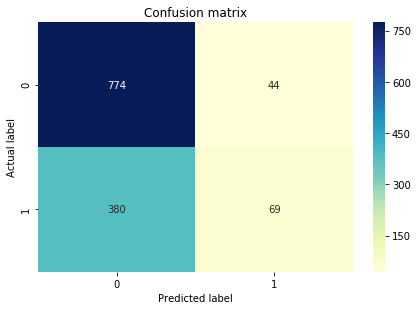

In [0]:
misinformation = mis_info.neural_misinformation()

pkl_liar_liar_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/liar_liar_Dataframe.pkl"
pkl_liar_liar_test_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/liar_liar_test_Dataframe.pkl"
fake_news_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/fake_news_Dataframe.pkl"
pkl_svm_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_svm.pkl'
pkl_rf_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_rf.pkl'
pkl_nb_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_nb.pkl'



misinformation.load_fake_news_data()
# misinfo = neural_misinformation()
df_fake_news = misinformation.load_fake_news_data()
df_train_news = misinformation.load_train_data()
df_real = df_train_news[df_train_news["label"]==1]
df_fake = df_train_news[df_train_news["label"]!=1]
# misinfo.train_models(df_train_news)
misinformation.predict_svm(df_train_news, pkl_svm_filename)
# show_eval_scores(svm_pipeline, unpickled_fake_news, 'SVM Count Vectorizer')
# misinfo.configure_plotly_browser_state()
# misinfo.plot_unigram(df_real, df_fake)

Random Forest Result
0.6447265625
Report for ---> Random Forest Model
Accuracy is: 0.6456195737963694
F1 score is: 0.6456195737963694
Precision score is: 0.6456195737963694
Recall score is: 0.6456195737963694


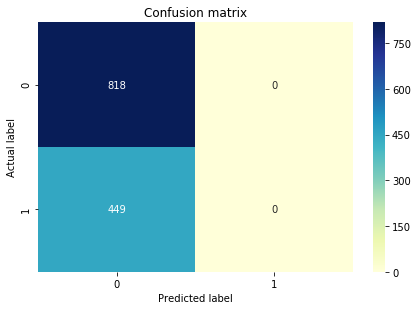

In [0]:
misinformation.predict_rf(df_train_news, pkl_rf_filename)

Naive Bayes Result
0.651171875
Report for ---> Naive Bayes
Accuracy is: 0.6456195737963694
F1 score is: 0.6456195737963694
Precision score is: 0.6456195737963694
Recall score is: 0.6456195737963694


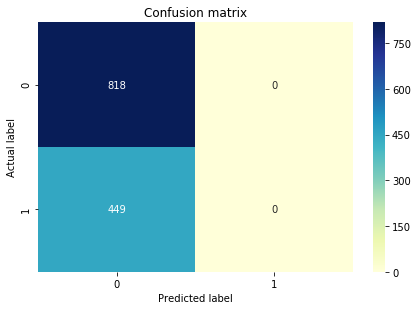

In [0]:
misinformation.predict_nb(df_train_news, pkl_nb_filename)

In [0]:
misinfo = neural_misinformation()
df_fake_news = misinfo.load_fake_news_data()
df_train_news = misinfo.load_train_data()
df_real = df_train_news[df_train_news["label"]==1]
df_fake = df_train_news[df_train_news["label"]!=1]
# misinfo.train_models(df_train_news)
misinfo.predict_svm(df_train_news, pkl_svm_filename)
# show_eval_scores(svm_pipeline, unpickled_fake_news, 'SVM Count Vectorizer')
# misinfo.configure_plotly_browser_state()
# misinfo.plot_unigram(df_real, df_fake)

In [0]:

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Imputer


class SensationalismFeature():

    def __init__(self):        
        self.load_data()
            
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df = 30, use_idf = True, smooth_idf = True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf', LogisticRegression(solver='liblinear', C = 32/100))
                ])

        self.logR_pipeline.fit(df_article_with_label['clean_article'], df_article_with_label['sensational_score'].astype(str))
        predicted_LogR = self.logR_pipeline.predict(df_article_with_label_test['clean_article'])
        score = metrics.accuracy_score(df_article_with_label_test['sensational_score'].astype(str), predicted_LogR)
        
    def load_data(self):
        col_names = ['Source','Date','Title','Article']
        df_article = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/Processed_CSV/NELA-GT-2018.csv', names=col_names)

        colnames = ['Unnamed: 0','NewsGuard, score', 'NewsGuard, overall_class','Media Bias / Fact Check, label','Media Bias / Fact Check, factual_reporting','Allsides, community_agree',	'Allsides, community_disagree',	'Allsides, community_label']
        names = ['Source','NewsGuard, score', 'NewsGuard, overall_class','Media Bias / Fact Check, label','Media Bias / Fact Check, factual_reporting','Allsides, community_agree',	'Allsides, community_disagree',	'Allsides, community_label']

        label = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/labels.csv', usecols=colnames)
        # (label['Unnamed: 0']='The Guardian').head()
        sources = ['The Guardian','CNN','BBC','USA Today','Fox News','National Review']
        # label[label['Unnamed: 0'] == sources].head()
        df_label = label[label['Unnamed: 0'].isin(sources)]
        df_label.rename(columns = {'Unnamed: 0':'Source'}, inplace = True) 

        df_article_with_label = pd.merge(df_article, df_label, on='Source', how='inner')



    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sf = SensationalismFeature()
sf.predict("The great unraveling has begun. Between the latest guilty plea by Donald Trumps fixer and the breakdown of a guilty plea by his campaign chairman, the threads are fraying on the scheming enterprise that is Trump Inc.")

### End of Importing Class

In [0]:
import seaborn as sb

# path_train='/content/drive/My Drive/Alternusvera/liar_dataset/train.tsv'
# path_test='/content/drive/My Drive/Alternusvera/liar_dataset/train.tsv'
# path_valid='/content/drive/My Drive/Alternusvera/liar_dataset/valid.tsv'


# train_data = pd.read_csv(path_train, sep='\t', header = None)
# train_data.head()

path_test = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/liar_dataset/test.tsv'
path_train = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/liar_dataset/train.tsv'
path_valid = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/liar_dataset/valid.tsv'

colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_data = pd.read_csv(path_train, sep='\t', names = colnames, error_bad_lines=False)
test_data = pd.read_csv(path_test, sep='\t', names = colnames, error_bad_lines=False)
valid_data = pd.read_csv(path_valid, sep='\t', names = colnames, error_bad_lines=False)

# Data Set 
https://www.kaggle.com/c/fake-news/data

Data set 1  - Liar Liar
  - Drive Location - 	/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/liar_dataset
	- Link - https://drive.google.com/open?id=1D1tcl-joz1eRZCm5bI1sPf1y85_RleCR

Data set 2 - Fake News
  - Drive Location - /content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/FakeNews_train.csv
	- Link - https://drive.google.com/file/d/1yB5fU_qNyctPUw9QMwO59H2P3mJhtqVM/view?usp=sharing


In [0]:
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", str(raw_news))
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    # stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words ] # if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [0]:
import nltk
nltk.download()
#Import below libraries
#punkt
#wordnet

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [0]:
import time

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train_data['clean'] = train_data["headline_text"].apply(cleaning) 

In [0]:
# Creating a list of stopwords
stopwords_list = list(stopwords.words('english'))
# stopwords_list

In [0]:
def update_lable(label):
  if label == "false" or label == "half-true" or label == "pants-fire" or label == "barely-true":
    return 0
  elif label == "true" or label == "mostly-true":
    return 1

In [0]:
train_data['label'] =  train_data.apply(lambda x: update_lable(x['label']),axis=1)
test_data['label'] =  test_data.apply(lambda x: update_lable(x['label']),axis=1)
# update_lable(train_data['label'])

In [0]:
train_data.label.unique
test_data.label.unique

<bound method Series.unique of 0       1
1       0
2       0
3       0
4       0
       ..
1262    0
1263    0
1264    0
1265    0
1266    0
Name: label, Length: 1267, dtype: int64>

In [0]:
train_data['word_number'] = train_data['headline_text'].apply(lambda x : len(x.split()))
train_data.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,word_number
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say the anni list polit group support third tr...,11
1,10540.json,0,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,when did the declin of coal start it start whe...,24
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre with john mccain by vote ...,19
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl is like to mandat fr...,12
4,9028.json,0,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,the econom turnaround start at the end of my term,10


## Data Cleaning and Text Preprocessing 

*Steps included in the preprocessing:*
- Remove Special Characters and Punctuations
- Lower case the news
- Tokenization
- Remove Stop Words
- Lemmatization
- Stemming 
- Spell Check 

###  Putting It All Together 

To make the code reusable, we need to create a function that can be called many times.

In [0]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train_data['clean'] = train_data["headline_text"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_data), "news:", (t2-t1)/60, "min")

t1 = time.time()
test_data['clean'] = test_data["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_data), "news:", (t2-t1)/60, "min")

t1 = time.time()
valid_data['clean'] = valid_data["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem valid data: \n", len(valid_data), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 10240 news: 0.07981425126393636 min


Time to clean, tokenize and stem test data: 
 1267 news: 0.010074985027313233 min


Time to clean, tokenize and stem valid data: 
 1284 news: 0.01000451644261678 min


In [0]:
train_data.columns
test_data.columns

Index(['jsonid', 'label', 'headline_text', 'subject', 'speaker',
       'speakerjobtitle', 'stateinfo', 'partyaffiliation', 'barelytruecounts',
       'falsecounts', 'halftruecounts', 'mostlytrueocunts',
       'pantsonfirecounts', 'context', 'clean'],
      dtype='object')

In [0]:

import os.path
liar_liar_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/liar_liar_Dataframe.pkl"
liar_liar_test_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/liar_liar_test_Dataframe.pkl"
# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop

train_data.to_pickle(liar_liar_file_name)
test_data.to_pickle(liar_liar_test_file_name)
if os.path.exists(liar_liar_file_name):
    print ("processed data frame already available as pickle file ")
else:
    train_data.to_pickle(liar_liar_file_name)
    test_data.to_pickle(liar_liar_test_file_name)

processed data frame already available as pickle file 


In [0]:
t = pd.read_pickle(liar_liar_test_file_name)
test_data.label.unique()

array([1, 0])

### Visualization 

#### WordCloud 

> As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. Note that it can give more information and insight of texts by analyzing correlations and similarities between words rather than analyzing texts only by the frequency of words appeared; however, it can give you some general shape of what this text is about quickly and intuitively.

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import string


%matplotlib inline

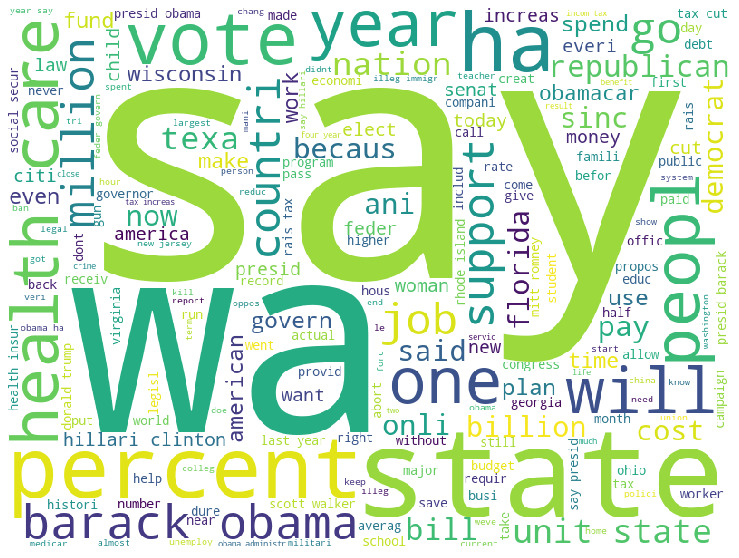

In [0]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_data['clean']))

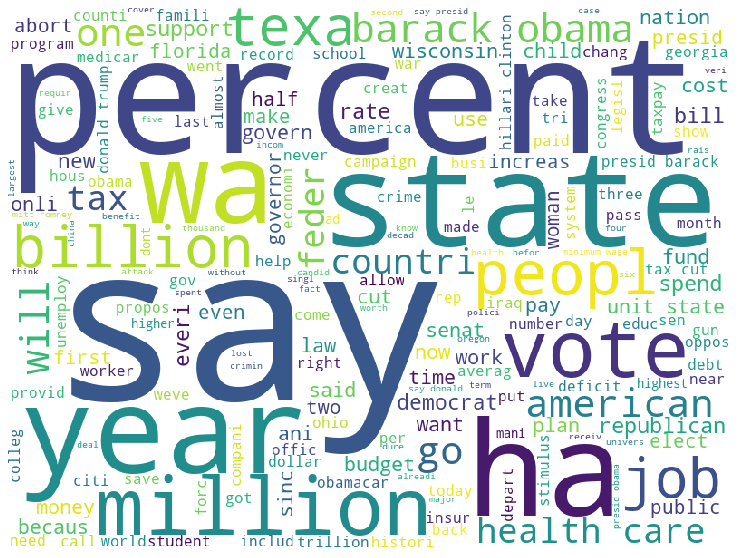

In [0]:
cloud(' '.join(test_data['clean']))

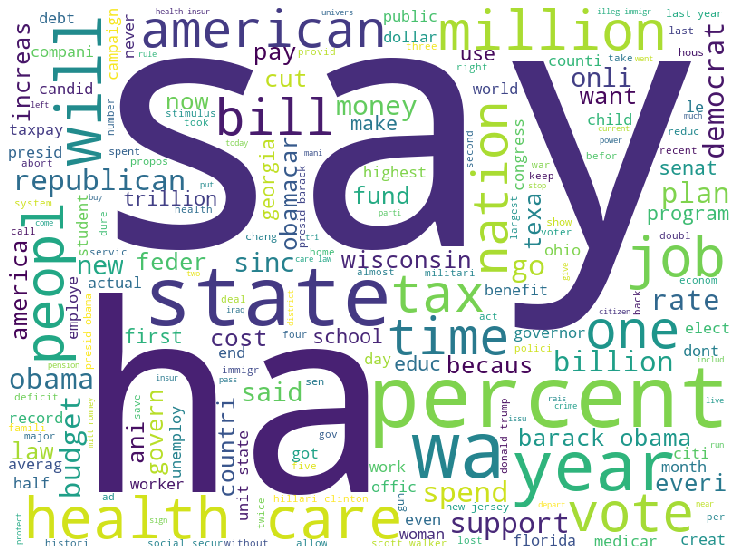

In [0]:
cloud(' '.join(valid_data['clean']))

#### Inferences from visulaization: 
- The large words are the words that are frequently appeared in the text/corpus

# Feature - Neural Micro-patterns-of-Misinformation

## Linguistic analysis based methods

The most effective linguistic analysis method applied to fake news detection is the n-gram approach [1, 2,3]. n-grams are sequences of n contiguous words in a text, constituting words (unigrams) and phrases (bigrams, trigrams) and are widely used in language modeling and text analysis. 

#### N-gram Approach

Neural Micro-patterns-of-Misinformation is one of Linguistic analysis in detecting fake news. Approach is based on "`Mihalcea and Strapparava 2009 proposed the use of n-grams for lie detection.`" Mihalcea and Strapparava trained Naive Bayes and Support
Vector Machine (SVM) classifiers with inputs being the term frequency vectors of n-grams in the texts, after tokenization and stemming but without stop word removal to detect the lies in the statement made.

Here, to detect the micro pattern in each news I am taking similar approach of applying Naive Bayes and SVM over the Term frequency of n-gram in texts.


In [0]:
pip install plotly

In [0]:
from plotly import tools  # to install $ pip install plotly
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [0]:
# Fix for plotly
##only for colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()

In [0]:
from collections import defaultdict
df_real = train_data[train_data["label"]==1]
df_fake = train_data[train_data["label"]!=1]

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [0]:
df_real.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,word_number
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre with john mccain by vote ...,19
5,12465.json,1,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,the chicago bear have had more start quarterba...,27
9,9741.json,1,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video,say gop primari oppon glenn grothman and joe l...,21
10,7115.json,1,"For the first time in history, the share of th...",elections,robert-menendez,U.S. Senator,New Jersey,democrat,1.0,3.0,1.0,3.0,0.0,a speech,for the first time in histori the share of the...,21
13,8616.json,1,The economy bled $24 billion due to the govern...,"economy,federal-budget,health-care",doonesbury,NaN,NaN,none,0.0,0.0,2.0,4.0,0.0,a Doonesbury strip in the Sunday comics,the economi bled billion due to the govern shu...,10


## Uni Gram - Construct dictionary with every single unique words from the list of words in the news.

In [0]:
configure_plotly_browser_state()
## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in df_real["clean"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in df_fake["clean"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of real news", 
                                          "Frequent words of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

# plt.figure(figsize=(10,16))
# sns.barplot(x="ngram_count", y="ngram", data=fd_sorted.loc[:50,:], color="b")
# plt.title("Frequent words for Insincere Questions", fontsize=16)
# plt.show()

# Observations:

Some of the top words are common across both the classes like  'state', 'obama','tax' etc
The other top words in real news after excluding the common ones at the very top are 'open', 'question' etc
The other top words in insincere questions after excluding the common ones are 'people','care', 'new' etc 

## Now let us also create bigram frequency plots for both the classes separately to get more idea.

In [0]:
# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_real["clean"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in df_fake["clean"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of real news", 
                                          "Frequent bigrams of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Observation

After eliminating all the repetitive words from legitimate news there are few interesting bigram words like 'Scott Walker', 'Social Secure','Ill Immigrant ' appeared only in FAKE NEWS. So, there are high chances that news with Scott Walker, Ill Immigrant, Unemploy Rate are inclined towards FAKE articles.


# TriGram

In [0]:
# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_real["clean"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')


freq_dict = defaultdict(int)
for sent in df_fake["clean"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of real news", 
                                          "Frequent trigrams of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Observation 

Trigrams with all these words after eliminating president, obama and clinton there are interesting words like 'health care law', 'afford care act', 'health care bill'.

These words gives a higher level of understanding that FAKE news are targeting on new Laws passed by government where there are lot of speculation amoung people when the law is still being discussed.

In [0]:
fd_sorted.head(50)

,word,wordcount
0,presid barack obama,119
1,say hillari clinton,65
2,gov scott walker,56
3,health care law,56
4,say u s,56
5,u s senat,50
6,u s rep,49
7,say presid barack,48
8,say barack obama,39
9,say donald trump,38


# Text Counts 

Identify the counts of each words, characters and Unique words, Stopwords

In [0]:
## Number of words in the text ##
train_data["num_words"] = train_data["clean"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train_data["num_unique_words"] = train_data["clean"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
train_data["num_chars"] = train_data["clean"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
train_data["num_stopwords"] = train_data["clean"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
train_data["num_punctuations"] =train_data['clean'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
train_data["num_words_upper"] = train_data["clean"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
train_data["num_words_title"] = train_data["clean"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
train_data["mean_word_len"] = train_data["clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))



NameError: ignored

# Plot word count against each other for Fake and Real news to understand is there is any Verbose difference between them

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



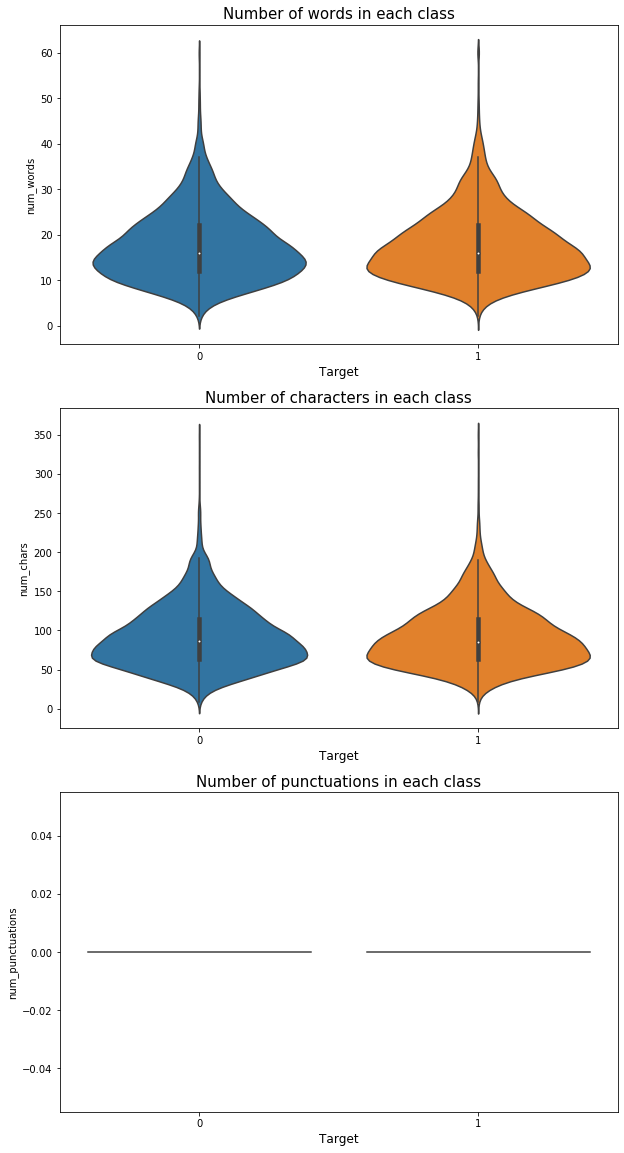

In [0]:
## Truncate some extreme values for better visuals ##
train_data['num_words'].loc[train_data['num_words']>60] = 60 #truncation for better visuals
train_data['num_punctuations'].loc[train_data['num_punctuations']>10] = 10 #truncation for better visuals
train_data['num_chars'].loc[train_data['num_chars']>350] = 350 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.violinplot(x='label', y='num_words', data=train_data, ax=axes[0])
axes[0].set_xlabel('Target', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.violinplot(x='label', y='num_chars', data=train_data, ax=axes[1])
axes[1].set_xlabel('Target', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.violinplot(x='label', y='num_punctuations', data=train_data, ax=axes[2])
axes[2].set_xlabel('Target', fontsize=12)
#plt.ylabel('Number of punctuations in text', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

# Observaion

This looks very similar like all the uniqe words and number of characters are close between Fake and Real News

# Visualizing word vector

Identify words which are closely related to each others.

In [0]:
import nltk
import re

from gensim.models import word2vec
from sklearn.manifold import TSNE

In [0]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in train_data["clean"].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

In [0]:
corpus = build_corpus(train_data) 

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



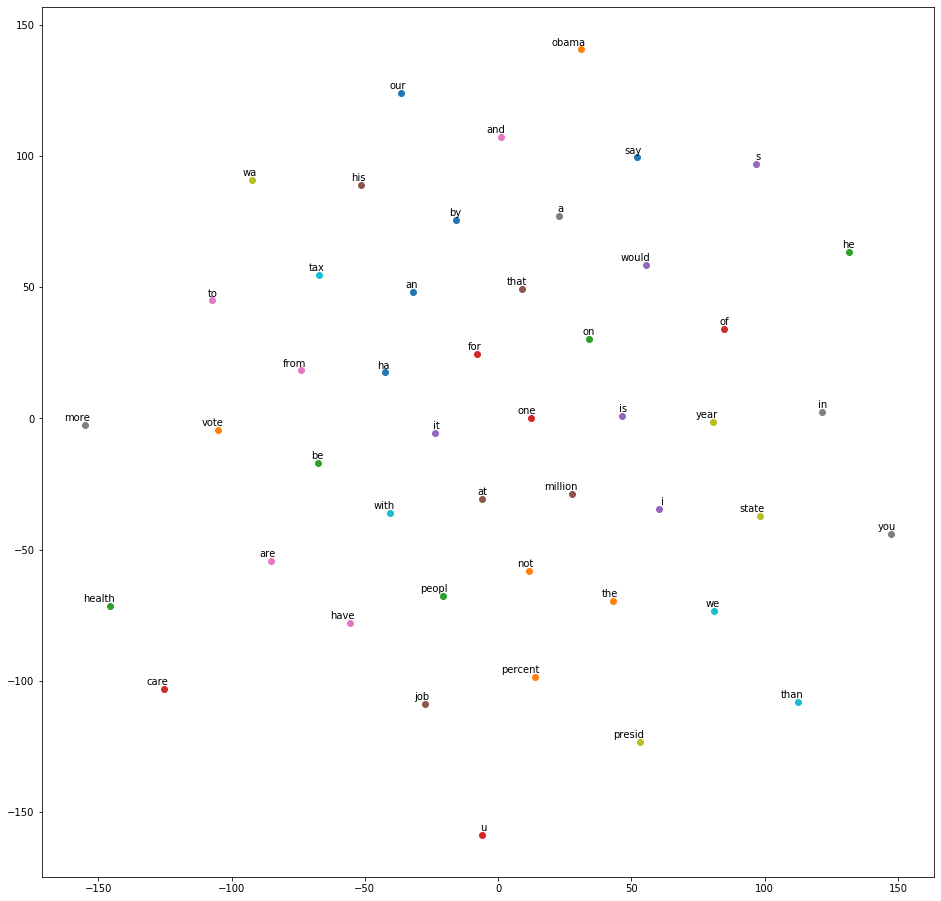

In [0]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

# Observation
Lets see what are the closely related words for term 'obama'. Here are the results

In [0]:
model.most_similar('obama')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



[('his', 0.9963874220848083),
 ('vote', 0.994149923324585),
 ('say', 0.9925583600997925),
 ('he', 0.9916942715644836),
 ('to', 0.9913302659988403),
 ('presid', 0.991131603717804),
 ('would', 0.989963173866272),
 ('tax', 0.9891543984413147),
 ('on', 0.9884370565414429),
 ('a', 0.9878931045532227)]

# Support Vector Machine (SVM) 

Apply SVM on the TF-IDF vector with n-gram test against the test news we have in the data set.

In [0]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     learning_curve)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [0]:
# Helper function to display the evaluation metrics of the different models
def show_eval_scores(model, test_data, model_name):
    """Function to show to different evaluation score of the model passed
    on the test set.
    
    Parameters:
    -----------
    model: scikit-learn object
        The model whose scores are to be shown.
    test_set: pandas dataframe
        The dataset on which the score of the model is to be shown.
    model_name: string
        The name of the model.
    """
    y_pred = model.predict(test_data['headline_text'])
    y_true = test_data['label']
    f1 = f1_score(y_true, y_pred, average='micro')
    precision = precision_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    accuracy = accuracy_score(y_true, y_pred)

    print('Report for ---> {}'.format(model_name))
    print('Accuracy is: {}'.format(accuracy))
    print('F1 score is: {}'.format(f1))
    print('Precision score is: {}'.format(precision))
    print('Recall score is: {}'.format(recall))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [0]:
svm_pipeline = Pipeline([
    ('svm_TF', TfidfVectorizer(lowercase=True, max_df= 0.7, ngram_range=(1,2 ), use_idf=True, smooth_idf=True))
      ,('svm_clf', SVC(gamma=0.7, kernel='rbf', random_state=20))
])

In [0]:
svm_pipeline.fit(train_data['clean'], train_data['label'] )

Pipeline(memory=None,
         steps=[('svm_TF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svm_clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=

In [0]:
nb_pipeline = Pipeline([
    ('nb_CV', CountVectorizer(ngram_range=(1,2))),
    ('nb_clf', MultinomialNB(alpha=6.5))
])

In [0]:
nb_pipeline.fit(train_data['clean'], train_data['label'] )

Pipeline(memory=None,
         steps=[('nb_CV',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb_clf',
                 MultinomialNB(alpha=6.5, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
rf_pipeline = Pipeline([
    ('rf_TF', TfidfVectorizer(lowercase=True, ngram_range=(1, 2), use_idf=True, smooth_idf=True)),
    ('rf_clf', RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1))
])

In [0]:
rf_pipeline.fit(train_data['clean'], train_data['label'] )

Pipeline(memory=None,
         steps=[('rf_TF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                ('rf_clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=15,
                                        max_features='auto',
                                        max_leaf_nodes=None,
      

In [0]:
import pickle
pkl_svm_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_svm.pkl'
pkl_rf_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_rf.pkl'
pkl_nb_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_nb.pkl'


pickle.dump(svm_pipeline, open(pkl_svm_filename, 'wb'))
pickle.dump(rf_pipeline, open(pkl_rf_filename, 'wb'))
pickle.dump(nb_pipeline, open(pkl_nb_filename, 'wb'))

In [0]:
class mis_information():

  pkl_svm_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_svm.pkl'
  pkl_rf_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_rf.pkl'
  pkl_nb_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_nb.pkl'

  def __init__(self):
        print("Initializing")
    
  def predict(self):
    loaded_model = pickle.load(open(pkl_svm_filename, 'rb'))
    result = loaded_model.score(train_data['headline_text'], train_data['label'])
    print('Support Vector Machine Result')
    print(result)

    loaded_model = pickle.load(open(pkl_rf_filename, 'rb'))
    loaded_model.predict
    result = loaded_model.score(train_data['headline_text'], train_data['label'])
    print('Random Forest Result')
    print(result)

    loaded_model = pickle.load(open(pkl_nb_filename, 'rb'))
    result = loaded_model.score(train_data['headline_text'], train_data['label'])
    print('Naive Bayes Result')
    print(result)
  

In [0]:
mis_info = mis_information()
mis_info.predict()

Report for ---> SVM Classifier TFIDF Vectorizer
Accuracy is: 0.76181640625
F1 score is: 0.76181640625
Precision score is: 0.76181640625
Recall score is: 0.76181640625


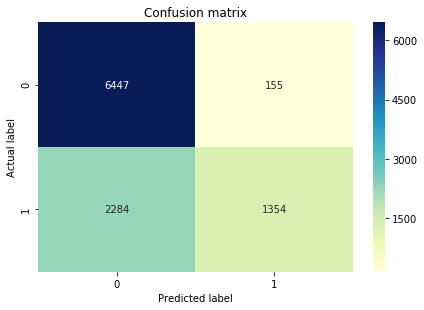

In [0]:
show_eval_scores(svm_pipeline,train_data, 'SVM Classifier TFIDF Vectorizer')

Report for ---> Naive Bayes Count Vectorizer
Accuracy is: 0.57216796875
F1 score is: 0.57216796875
Precision score is: 0.57216796875
Recall score is: 0.57216796875


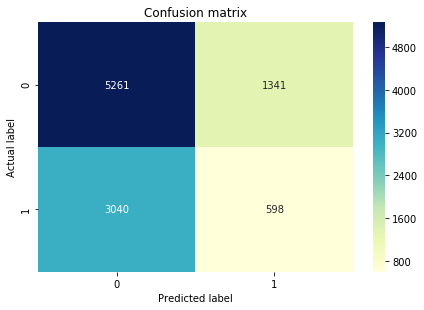

In [0]:
show_eval_scores(nb_pipeline, train_data, 'Naive Bayes Count Vectorizer')

Report for ---> Random Forest Classifier TFIDF Vectorizer
Accuracy is: 0.3552734375
F1 score is: 0.3552734375
Precision score is: 0.3552734375
Recall score is: 0.3552734375


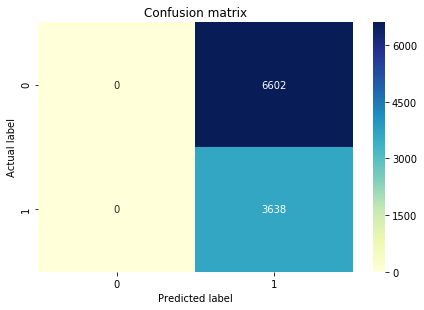

In [0]:
show_eval_scores(rf_pipeline, train_data, 'Random Forest Classifier TFIDF Vectorizer')

#Ignore below steps as we have loaded from pickel files above

In [0]:
svm_pipeline = Pipeline([
    ('svm_TF', TfidfVectorizer(lowercase=True, max_df= 0.7, ngram_range=(1,2 ), use_idf=True, smooth_idf=True))
      ,('svm_clf', SVC(gamma=0.7, kernel='rbf', random_state=20))
])

In [0]:
svm_pipeline.fit(train_data['clean'], train_data['label'] )

Pipeline(memory=None,
         steps=[('svm_TF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svm_clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=

# Naive Bayes

In [0]:
nb_pipeline = Pipeline([
    ('nb_CV', CountVectorizer(ngram_range=(1,2))),
    ('nb_clf', MultinomialNB(alpha=6.5))
])

In [0]:
nb_pipeline.fit(train_data['clean'], train_data['label'])

# Random Forest

In [0]:
rf_pipeline = Pipeline([
    ('rf_TF', TfidfVectorizer(lowercase=True, ngram_range=(1, 2), use_idf=True, smooth_idf=True)),
    ('rf_clf', RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1))
])

In [0]:
rf_pipeline.fit(train_data['clean'], train_data['label'])

Pipeline(memory=None,
         steps=[('rf_TF',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                ('rf_clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=15,
                                        max_features='auto',
                                        max_leaf_nodes=None,
      

# Data Amalgamation

Read data from Fake news data set and enrich existing data set to get detailed analaysis.

DataSet : https://www.kaggle.com/c/fake-news/data


In [0]:
train_data.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,word_number
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say the anni list polit group support third tr...,11
1,10540.json,0,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,when did the declin of coal start it start whe...,24
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre with john mccain by vote ...,19
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl is like to mandat fr...,12
4,9028.json,0,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,the econom turnaround start at the end of my term,10


In [0]:
train_data.speaker.unique()

array(['dwayne-bohac', 'scott-surovell', 'barack-obama', ...,
       'john-rafferty', 'richard-tomlins', 'alan-powell'], dtype=object)

In [0]:
fakeNews_train = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/FakeNews_train.csv'
fake_news_data = pd.read_csv(fakeNews_train, sep=',',  error_bad_lines=False)

In [0]:
fake_news_data = fake_news_data[:10000]
fake_news_data.shape

(10000, 5)

In [0]:
fake_news_data['text']

0       House Dem Aide: We Didn’t Even See Comey’s Let...
1       Ever get the feeling your life circles the rou...
2       Why the Truth Might Get You Fired October 29, ...
3       Videos 15 Civilians Killed In Single US Airstr...
4       Print \nAn Iranian woman has been sentenced to...
                              ...                        
9995    WASHINGTON  —   Representative Mike Pompeo was...
9996    SAN FRANCISCO  —   There are video games that ...
9997    The soaring spires, the sloping shores, the st...
9998    WASHINGTON  —   The Supreme Court, awaiting th...
9999    geoengineeringwatch.org \nGlobal climate engin...
Name: text, Length: 10000, dtype: object

# Data Cleaning

**Clean the data and store the cleaned dataframe into Pickle file for effective reuse.**

In [0]:
import time
import os.path
fake_news_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/fake_news_Dataframe.pkl"
test_data_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/liar_liar_test_Dataframe.pkl"
# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop

if os.path.exists(fake_news_file_name):
    print ("processed data frame already available as pickle file ")
else:
    fake_news_data['result_clean_text'] = fake_news_data['text'].apply(cleaning)
    fake_news_data.to_pickle(fake_news_file_name)



processed data frame already available as pickle file 


In [0]:
unpickled_fake_news = pd.read_pickle(fake_news_file_name)
# svm_pipeline.fit(enriched_data['result_clean_text'], enriched_data['label'] )
unpickled_fake_news['result_clean_text']

0       hous dem aid we didn t even see comey s letter...
1       ever get the feel your life circl the roundabo...
2       whi the truth might get you fire octob the ten...
3       video civilian kill in singl u airstrik have b...
4       print an iranian woman ha been sentenc to six ...
                              ...                        
9995    washington repres mike pompeo wa onc point ask...
9996    san francisco there are video game that go vir...
9997    the soar spire the slope shore the straitjacke...
9998    washington the suprem court await the outcom o...
9999    geoengineeringwatch org global climat engin pr...
Name: result_clean_text, Length: 10000, dtype: object

In [0]:
pkl_svm_on_amalg_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_svm_on_amalg.pkl'
pkl_rf_on_amalg_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_rf_on_amalg.pkl'
pkl_nb_on_amalg_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_nb_on_amalg.pkl'


In [0]:
def show_eval_scores(model, test_data, model_name):
    """Function to show to different evaluation score of the model passed
    on the test set.
    
    Parameters:
    -----------
    model: scikit-learn object
        The model whose scores are to be shown.
    test_set: pandas dataframe
        The dataset on which the score of the model is to be shown.
    model_name: string
        The name of the model.
    """
    y_pred = model.predict(test_data['result_clean_text'])
    y_true = test_data['label']
    f1 = f1_score(y_true, y_pred, average='micro')
    precision = precision_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    accuracy = accuracy_score(y_true, y_pred)

    print('Report for ---> {}'.format(model_name))
    print('Accuracy is: {}'.format(accuracy))
    print('F1 score is: {}'.format(f1))
    print('Precision score is: {}'.format(precision))
    print('Recall score is: {}'.format(recall))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# SVM on Fake News dataset

In [0]:
if os.path.exists(pkl_svm_on_amalg_filename):
    print ("processed pickle file for SVM on amalgamated data is avaialble")
    loaded_model = pickle.load(open(pkl_svm_on_amalg_filename, 'rb'))
    result = loaded_model.score(unpickled_fake_news['result_clean_text'], unpickled_fake_news['label'])
    print('Support Vector Machine Result')
    print(result)
else:
    nb_pipeline.fit(unpickled_fake_news['result_clean_text'], unpickled_fake_news['label'])
    pickle.dump(svm_pipeline, open(pkl_svm_on_amalg_filename, 'wb'))
    pickle.dump(rf_pipeline, open(pkl_rf_on_amalg_filename, 'wb'))
    pickle.dump(nb_pipeline, open(pkl_nb_on_amalg_filename, 'wb'))  
# rf_pipeline.fit(train_data['clean'], train_data['label'])

processed pickle file for SVM on amalgamated data is avaialble
Support Vector Machine Result
0.4948


Report for ---> SVM Count Vectorizer
Accuracy is: 0.4948
F1 score is: 0.4948
Precision score is: 0.4948
Recall score is: 0.4948


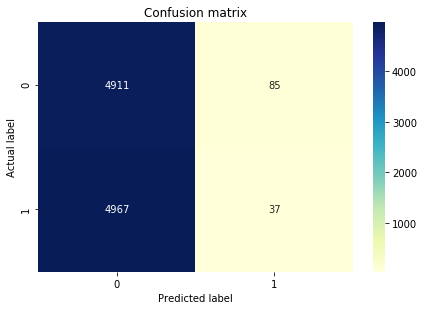

In [0]:
show_eval_scores(svm_pipeline, unpickled_fake_news, 'SVM Count Vectorizer')

# Naive Bayes on Fake News Dataset

In [0]:
if os.path.exists(pkl_nb_on_amalg_filename):
    print ("processed pickle file for Naive Bayes on amalgamated data is avaialble")
    loaded_model = pickle.load(open(pkl_nb_on_amalg_filename, 'rb'))
    result = loaded_model.score(unpickled_fake_news['result_clean_text'],  unpickled_fake_news['label'])
    print('Support Vector Machine Result')
    print(result)
else:
    nb_pipeline.fit(unpickled_fake_news['result_clean_text'], unpickled_fake_news['label'])
    pickle.dump(nb_pipeline, open(pkl_nb_on_amalg_filename, 'wb'))


processed pickle file for Naive Bayes on amalgamated data is avaialble
Support Vector Machine Result
0.8743


Report for ---> Naive Bayes Count Vectorizer
Accuracy is: 0.8743
F1 score is: 0.8743
Precision score is: 0.8743
Recall score is: 0.8743


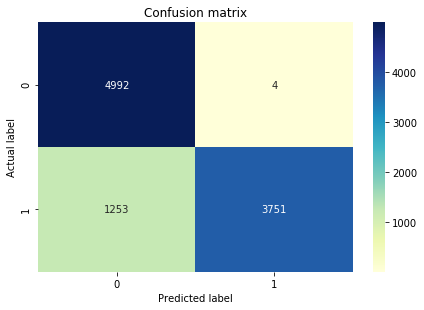

In [0]:
show_eval_scores(nb_pipeline, unpickled_fake_news, 'Naive Bayes Count Vectorizer')

# Random Forest

In [0]:
if os.path.exists(pkl_rf_on_amalg_filename):
    print ("processed pickle file for Random Forest on amalgamated data is avaialble")
    loaded_model = pickle.load(open(pkl_rf_on_amalg_filename, 'rb'))
    result = loaded_model.score(unpickled_fake_news['result_clean_text'], unpickled_fake_news['label'] )
    print('Random Forest Result')
    print(result)
else:
    rf_pipeline.fit(unpickled_fake_news['result_clean_text'], unpickled_fake_news['label'] )
    pickle.dump(rf_pipeline, open(pkl_rf_on_amalg_filename, 'wb'))

processed pickle file for Random Forest on amalgamated data is avaialble
Random Forest Result
0.9273


Report for ---> Random Forest
Accuracy is: 0.9273
F1 score is: 0.9273
Precision score is: 0.9273
Recall score is: 0.9273


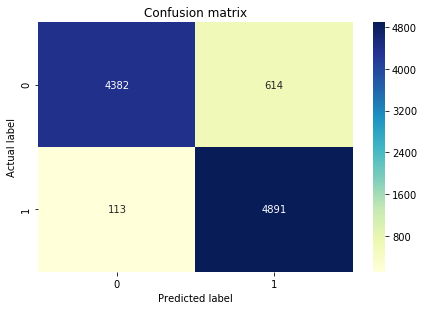

In [0]:
show_eval_scores(rf_pipeline, unpickled_fake_news, 'Random Forest')

# Software Engineering Best Practices

### Read From Saved Model
### Process the new Amalgamated data set with already trained model.
### Analyse the Result

Initializing
Index(['id', 'title', 'author', 'text', 'label', 'result_clean_text'], dtype='object')
Index(['id', 'title', 'author', 'text', 'label', 'result_clean_text'], dtype='object')
           jsonid  ...  word_number
0       2635.json  ...           11
1      10540.json  ...           24
2        324.json  ...           19
3       1123.json  ...           12
4       9028.json  ...           10
...           ...  ...          ...
10235   5473.json  ...           17
10236   3408.json  ...           14
10237   3959.json  ...           28
10238   2253.json  ...           11
10239   1155.json  ...           30

[10240 rows x 16 columns]
Support Vector Machine Result
0.76181640625
Report for ---> Support Vector Machine
Accuracy is: 0.665351223362273
F1 score is: 0.665351223362273
Precision score is: 0.665351223362273
Recall score is: 0.665351223362273


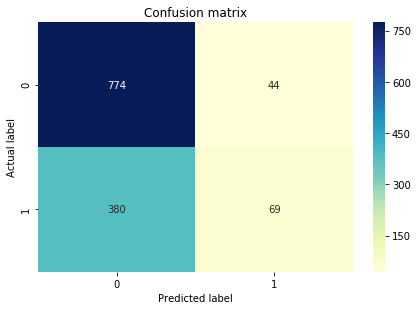

In [0]:
misinformation = mis_info.neural_misinformation()

pkl_liar_liar_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/liar_liar_Dataframe.pkl"
pkl_liar_liar_test_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/liar_liar_test_Dataframe.pkl"
fake_news_file_name = "/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/fake_news_Dataframe.pkl"
pkl_svm_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_svm.pkl'
pkl_rf_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_rf.pkl'
pkl_nb_filename = '/content/drive/My Drive/AlternusVeraDataSets2019/Spartans/Doss/misinfo_nb.pkl'



misinformation.load_fake_news_data()
# misinfo = neural_misinformation()
df_fake_news = misinformation.load_fake_news_data()
df_train_news = misinformation.load_train_data()
df_real = df_train_news[df_train_news["label"]==1]
df_fake = df_train_news[df_train_news["label"]!=1]
# misinfo.train_models(df_train_news)
misinformation.predict_svm(df_train_news, pkl_svm_filename)
# show_eval_scores(svm_pipeline, unpickled_fake_news, 'SVM Count Vectorizer')
# misinfo.configure_plotly_browser_state()
# misinfo.plot_unigram(df_real, df_fake)

Random Forest Result
0.6447265625
Report for ---> Random Forest Model
Accuracy is: 0.6456195737963694
F1 score is: 0.6456195737963694
Precision score is: 0.6456195737963694
Recall score is: 0.6456195737963694


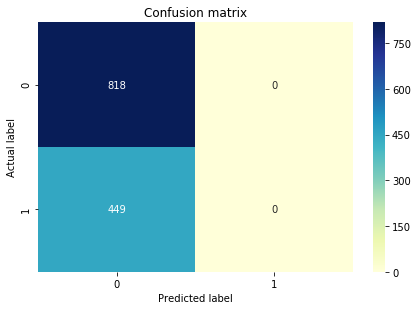

In [0]:
misinformation.predict_rf(df_train_news, pkl_rf_filename)

Naive Bayes Result
0.651171875
Report for ---> Naive Bayes
Accuracy is: 0.6456195737963694
F1 score is: 0.6456195737963694
Precision score is: 0.6456195737963694
Recall score is: 0.6456195737963694


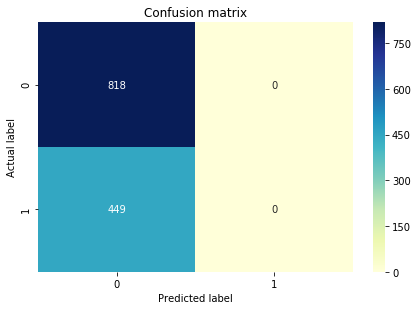

In [0]:
misinformation.predict_nb(df_train_news, pkl_nb_filename)

In [0]:
misinfo = neural_misinformation()
df_fake_news = misinfo.load_fake_news_data()
df_train_news = misinfo.load_train_data()
df_real = df_train_news[df_train_news["label"]==1]
df_fake = df_train_news[df_train_news["label"]!=1]
# misinfo.train_models(df_train_news)
misinfo.predict_svm(df_train_news, pkl_svm_filename)
# show_eval_scores(svm_pipeline, unpickled_fake_news, 'SVM Count Vectorizer')
# misinfo.configure_plotly_browser_state()
# misinfo.plot_unigram(df_real, df_fake)

In [0]:

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Imputer


class SensationalismFeature():

    def __init__(self):        
        self.load_data()
            
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df = 30, use_idf = True, smooth_idf = True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf', LogisticRegression(solver='liblinear', C = 32/100))
                ])

        self.logR_pipeline.fit(df_article_with_label['clean_article'], df_article_with_label['sensational_score'].astype(str))
        predicted_LogR = self.logR_pipeline.predict(df_article_with_label_test['clean_article'])
        score = metrics.accuracy_score(df_article_with_label_test['sensational_score'].astype(str), predicted_LogR)
        
    def load_data(self):
        col_names = ['Source','Date','Title','Article']
        df_article = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/Processed_CSV/NELA-GT-2018.csv', names=col_names)

        colnames = ['Unnamed: 0','NewsGuard, score', 'NewsGuard, overall_class','Media Bias / Fact Check, label','Media Bias / Fact Check, factual_reporting','Allsides, community_agree',	'Allsides, community_disagree',	'Allsides, community_label']
        names = ['Source','NewsGuard, score', 'NewsGuard, overall_class','Media Bias / Fact Check, label','Media Bias / Fact Check, factual_reporting','Allsides, community_agree',	'Allsides, community_disagree',	'Allsides, community_label']

        label = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/ThirumalaiNambiDoss/NELA_DataSet/labels.csv', usecols=colnames)
        # (label['Unnamed: 0']='The Guardian').head()
        sources = ['The Guardian','CNN','BBC','USA Today','Fox News','National Review']
        # label[label['Unnamed: 0'] == sources].head()
        df_label = label[label['Unnamed: 0'].isin(sources)]
        df_label.rename(columns = {'Unnamed: 0':'Source'}, inplace = True) 

        df_article_with_label = pd.merge(df_article, df_label, on='Source', how='inner')



    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sf = SensationalismFeature()
sf.predict("The great unraveling has begun. Between the latest guilty plea by Donald Trumps fixer and the breakdown of a guilty plea by his campaign chairman, the threads are fraying on the scheming enterprise that is Trump Inc.")


# Feature 1: Sentiment analysis 

#### Using Vader Sentiment Analyser

##### [Sentiment Intensity Analyzer](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html)


> VADER, or the **Valence Aware Dictionary and sEntiment Reasoner** has created a package that performes sentiment analysis using the polarity-based, where pieces of texts are classified as either positive or negative, or valence-based, where the intensity of the sentiment is taken into account. For example, the words ‘good’ and ‘excellent’ would be treated the same in a polarity-based approach, whereas ‘excellent’ would be treated as more positive than ‘good’ in a valence-based approach

- It is based on lexicons of sentiment-related word.
- The first three, positive, neutral and negative, represent the proportion of the text that falls into those categories.
- The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1

In [0]:
import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(train_news['clean'][0])

In [0]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [0]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

- senti.polarity_scores is a dictionary
- pos and neg indicates - positive and negative emotions in sentence
- we should be interested in compound score which calculates the final effect

In [0]:
sentiment = []
vader_pol = []
cmp_score = []
for row in train_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
train_news['sentiment_vector'] = sentiment
train_news['vader_polarity'] = vader_pol
train_news['sentiment_score'] = cmp_score

In [0]:
train_news.head(5)

In [0]:
sentiment = []
vader_pol = []
cmp_score = []

for row in test_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
test_news['sentiment_vector'] = sentiment
test_news['vader_polarity'] = vader_pol
test_news['sentiment_score'] = cmp_score

In [0]:
test_news.head(5)

In [0]:
sentiment = []
vader_pol = []
cmp_score = []

for row in valid_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
valid_news['sentiment_vector'] = sentiment
valid_news['vader_polarity'] = vader_pol
valid_news['sentiment_score'] = cmp_score

In [0]:
valid_news.head(5)

##### Saved the trained dataset into a seperate CSV file 

In [0]:
train_news.to_csv("input_data/train_sentiment.csv", sep=',')
test_news.to_csv("input_data/test_sentiment.csv", sep=',')
valid_news.to_csv("input_data/valid_sentiment.csv", sep=',')

# Feature 2:  LDA Topic Modelling 


In [0]:
train_news['index'] = train_news.index
data = train_news
train_lda = data[['clean', 'index']]
train_lda.head(4)

In [0]:
test_news['index'] = test_news.index
data = test_news
test_lda = data[['clean', 'index']]
test_lda.head(4)

In [0]:
valid_news['index'] = valid_news.index
data = valid_news
valid_lda = data[['clean', 'index']]
valid_lda.head(4)

#### Split the clean news into list of words

In [0]:
processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
processed_docs[:4]

### Latent Dirichlet Allocation (LDA)

> It is an example of a probabilistic topic model. Topic models are a great way to automatically explore and structure a large set of documents: they group or cluster documents based on the words that occur in them. As documents on similar topics tend to use a similar sub-vocabulary, the resulting clusters of documents can be interpreted as discussing different 'topics'.

In [0]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = train_news['clean'].map(get_word_tokens)

### Create a function to build the dictionary and tokenized docs for given feature

Below function does the following
* #### Dictionary
Returns Dictionary given, dataframe and column name
* #### Tokenizeddocs
Returns Tokenizeddocs, of the all the words in a text in that column can be used for bow_corpus
* #### Dictionary is filtered using Gensim filter_extremes
    Filter out tokens that appear in less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.


In [0]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

#### Gensim filter_extremes

> Filter out tokens that appear less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.

#### Create a function to build bow_corpus from dictionary and tokenized_docs

In [0]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

**Gensim doc2bow**

For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier

#### Create a function to build tfidf_corpus from bow_corpus

Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

#### Create a function to run ldamodel and print top 10 topics

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

#### Create a function to run ldamodel and print top 10 topics

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

#### Create a function to enrich data with lda topics, lda topics score, top words

In [0]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

#### Create a function that can enrich topic data to dataframe

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

### Bag of Words

#### Create a dictionary and tokens

> Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

#### Create a function to convert text to word tokens from cleaned dataset

In [0]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(train_news,
                                                                      'clean')

### Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [0]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

#### Generate TF-IDF bow_corpus
Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [0]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)

### Running LDA model using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

**GOAL**: To get top ten topics with top words. 

In [0]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

#### Explanation for LDA 
![[Explanation of LDA](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1508239587/n4ZpIXl_egq7mq.png)](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1508239587/n4ZpIXl_egq7mq.png)

### Semisupervised Labeling
Based on train,test and valid data explored the topic scores for sample data and identified below topics

In [0]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

####  Function to add topicnumber, topicscore, topiclabel, topwords

In [0]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
train_news = update_lda_results_to_dataset(
    train_news, headlinetopiccolnames,'clean', dictionary_headline, lda_model_headline, lda_headline_topic_words)
train_news.head()

In [0]:
test_news = update_lda_results_to_dataset(
    test_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
test_news.head()

In [0]:
valid_news = update_lda_results_to_dataset(
    valid_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
valid_news.head()

### Visualize the LDA Distribution of news against Top 10 Topics

**GOAL 1:** *Each of the N documents will be represented in the LDA model by a vector of length M*
**GOAL 2:** *Each of the M topics is represented by a vector of length V*

In [0]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(train_news) # TRAIN Document Vector

In [0]:
create_distribution(test_news)# TEST Document Vector

In [0]:
create_distribution(valid_news)# VALID Document Vector

##### Saved the latest dataset into a seperate CSV file 

In [0]:
train_news.to_csv("input_data/train_lda.csv", sep=',')
test_news.to_csv("input_data/test_lda.csv", sep=',')
valid_news.to_csv("input_data/valid_lda.csv", sep=',')

# Feature 3:  Sensational Feature Analysis

#### [Sensational Words Corpus](https://www.thepersuasionrevolution.com/380-high-emotion-persuasive-words/)

>  Words aren’t just strings of alphabets sewn together with ink. Words are cues. Words are triggers. Words when used correctly can transform an “eh whatever” into “wow that’s it!”. Words can make you go from literally ROFL to fuming with fury to an uncontrollable-urge-to-take-action-NOW-or-the-earth-may-stop-swinging -on-its-axis.

> Highly emotional words are capable capable of transforming an absolute no into almost yes and a “perhaps” into “for sure”!

Words that are used:
- When you are trying to sell people a solution
- When you are trying to get them to take an action (like, share, subscribe, buy)
- When you are trying to get people to click and read your article
- When you are trying to get someone to agree with you

**There are 1400+ words that are both positive and negative emotions that will help to predict the sensational score for an article**

> I have used these words to perform cosin similarity and predict the sensational similarity score for each news in the give dataset.

In [0]:
corpus = []
for i in train_news['clean']:
    corpus.append(i)
# corpus

sensational_corpus=[]
sensational_words = pd.read_csv('input_data/sensationalism/sensational_words_dict.csv', sep="\t+", header=None, usecols=[0] )
print(len(sensational_words))
sensational_dictionary = ' '.join(sensational_words[0].astype(str))
sensational_corpus.append(sensational_dictionary)

## SenticNet:   

#### Data Enrichment 

> It provides polarity associated with 50,000 natural language concepts. A polarity is a floating number between -1 and +1. Minus one is extreme negativity, and plus one is extreme positivity. The knowledge base is free. It can be downloaded as XML file. 
SenticNet 5 reaches 100,000 commonsense concepts by employing recurrent neural networks to infer primitives by lexical substitution.

In [0]:
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")
sentic_net = pd.read_csv('input_data/sensationalism/senticnet5.txt', sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])
sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
sentic_net = sentic_net.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sentic_net))
print(sentic_net.head(10))

In [0]:
# sentic_net['Token'] provides list of words from the SenticNet DICTIONARY
senti_pos = sentic_net.loc[sentic_net.Polarity == "positive"]
senti_pos = senti_pos.loc[senti_pos.Intensity > 0.90]
dictionary = ' '.join(senti_pos.Token.astype(str))
sensational_corpus.append(dictionary)
print(len(senti_pos))

## TF-IDF and Cosine Similarity

#### TF-IDF

> TF-IDF (Term Frequency - Inverse Document Frequency) can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVec = TfidfVectorizer(max_features=1000)

tfidf_corpus = tfidfVec.fit_transform(corpus)
tf_idf_senti = tfidfVec.fit_transform(sensational_corpus)
words = tfidfVec.get_feature_names()

In [0]:
tfidf_corpus.toarray()

In [0]:
tf_idf_senti.toarray()

In [0]:
tfidfVec.vocabulary_

In [0]:
train_tfidf = tfidfVec.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])


test_tfidf = tfidfVec.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])


valid_tfidf = tfidfVec.fit_transform(valid_news['clean'])
print('Valid dim:', valid_tfidf.shape)
print(valid_tfidf.A[:10])


#### Cosine Similarity Score

> The cosine similarity between two vectors (or two documents on the Vector Space) is a measure that calculates the cosine of the angle between them. This metric is a measurement of orientation and not magnitude, it can be seen as a comparison between documents on a normalized space because we’re not taking into the consideration only the magnitude of each word count (tf-idf) of each document, but the angle between the documents.

> I have compared the sentiment vector of each doucment and estimated a similarity score which is saved as a column in the training and test dataset. 

In [0]:
# from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
similarity_score = []
for i in range(len(train_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))

In [0]:
train_news['sensational_score'] = similarity_score
train_news.head(5)

In [0]:
corpus = []
for i in test_news['clean']:
    corpus.append(i)
# corpus

tfidf_corpus = tfidfVec.fit_transform(corpus)

similarity_score = []
for i in range(len(test_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))
    
test_news['sensational_score'] = similarity_score
test_news.head(5)

##### Saved the latest dataset into a seperate CSV file 

In [0]:
train_news.to_csv("input_data/train_sensationalism.csv", sep=',')
test_news.to_csv("input_data/test_sensationalism.csv", sep=',')
valid_news.to_csv("input_data/valid_sensationalism.csv", sep=',')

# Feature 4: Political Affiliation Model 

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import itertools

class PartyAffiliation():
    
    # API to check whether the subject(Headline) is present in the 
    # - democrats most used words if the party affiliation is democrat
    # - republicans most used words if the part affiliation is republican
    def partyAffiliationFromHeadline(self, r):
        v = r['subject_str']
        p = r['party_str']
        if (p =='democrat'):
            s2 = set(self.countDemV.get_feature_names())
        if (p =='republican'):
            s2 = set(self.countRepV.get_feature_names())
        if (p != 'democract' and p !='republican'):
            return 1 #'true'        
        if set(v).intersection(s2):
            return 1 #'true'
        else:
            return 0 #'false'

    #API to convert true, mostly-true and half-true to true
    # false, barely-true and pants-fire to false
    def convertMulticlassToBinaryclass(self, r):
        v = r['label']
        if (v == 'true'):
            return 1 #'true'
        if (v == 'mostly-true'):
            return 1 #'true'
        if (v == 'half-true'):
            return 1 #'true'
        if (v == 'barely-true'):
            return 0 #'false'
        if (v == 'false'):
            return 0 #'false'
        if (v == 'pants-fire'):
            return 0 #'false'
            
            
            
    def plot_confusion_matrix(self, cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')       
            
    
    def __init__(self):        

        columnNamesPar = ["id", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]
        dataTrainPar = pd.read_csv('input_data/dataset/train.tsv', sep='\t', header=None, names = columnNamesPar)
        dataValidatePar = pd.read_csv('input_data/dataset/valid.tsv', sep='\t', header=None, names = columnNamesPar)
        dataTestPar = pd.read_csv('input_data/dataset/test.tsv', sep='\t', header=None, names = columnNamesPar)
        
    
        # Remove unwanted columns in the dataset
        columnsToRemovePar = ['id', 'speaker', 'context','speaker_job_title', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
        dataTrainPar = dataTrainPar.drop(columns=columnsToRemovePar)
        dataValidatePar = dataValidatePar.drop(columns=columnsToRemovePar)
        dataTestPar = dataTestPar.drop(columns=columnsToRemovePar)
        
        # convert the labels to true and false only
        dataTrainPar['label'] = dataTrainPar.apply(self.convertMulticlassToBinaryclass, axis=1)
        dataValidatePar['label'] = dataValidatePar.apply(self.convertMulticlassToBinaryclass, axis=1)
        dataTestPar['label'] = dataTestPar.apply(self.convertMulticlassToBinaryclass, axis=1)
        
        # display all the party affiliations and show the count of each party 
#         dataTrainPar.groupby('party_affiliation').count()[['state_info']].rename(
#         columns={'state_info': 'count'}).sort_values(
#         'count', ascending=False).reset_index().plot.bar(
#         x='party_affiliation', y='count', figsize=(16, 10), fontsize=18);
        
        # As we are considering only democrat, republican and none (top 3 party affiliations),
        # ignoring other party affiliations
        rowsToRemove = ['Moderate', 'activist', 'business-leader', 'columnist', 'constitution-party', 'democratic-farmer-labor', 'education-official', 'government-body', 'green', 'independent', 'journalist', 'labor-leader', 'liberal-party-canada', 'libertarian', 'nan', 'newsmaker', 'ocean-state-tea-party-action', 'organization', 'state-official', 'talk-show-host', 'tea-party-member']

        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'Moderate']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'activist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'business-leader']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'columnist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'constitution-party']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'democratic-farmer-labor']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'education-official']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'government-body']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'green']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'independent']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'journalist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'labor-leader']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'liberal-party-canada']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'libertarian']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'nan']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'newsmaker']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'ocean-state-tea-party-action']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'organization']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'state-official']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'talk-show-host']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'tea-party-member']

        # As we are considering only democrat, republican and none (top 3 party affiliations),
        # ignoring other party affiliations

        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'Moderate']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'activist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'business-leader']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'columnist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'constitution-party']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'democratic-farmer-labor']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'education-official']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'government-body']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'green']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'independent']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'journalist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'labor-leader']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'liberal-party-canada']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'libertarian']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'nan']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'newsmaker']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'ocean-state-tea-party-action']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'organization']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'state-official']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'talk-show-host']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'tea-party-member']

        
        dataTrainPar['party_str'] = dataTrainPar['party_affiliation'].astype(str)
        dataTestPar['party_str'] = dataTestPar['party_affiliation'].astype(str)
        

        #predicting truth level
#        dataTrainPar.groupby('label').count()[['party_affiliation']].reset_index().plot.bar(x='label', y='party_affiliation')
        
        # get the most used democrat words
        self.countDemV = CountVectorizer(stop_words='english', min_df=40, max_df=80, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        dataTrainDem= dataTrainPar
        dataTrainDem = dataTrainPar.loc[dataTrainPar['party_str'] == 'democrat']
        dem_count = self.countDemV.fit_transform(dataTrainDem['statement'].values)
        
        #get the republican most used words
        
        self.countRepV = CountVectorizer(stop_words='english', min_df=20, max_df=40, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        dataTrainRep= dataTrainPar
        dataTrainRep = dataTrainPar.loc[dataTrainPar['party_str'] == 'republican']
        rep_count = self.countRepV.fit_transform(dataTrainRep['statement'].values)

        dataTestDem= dataTestPar
        dataTestDem = dataTestPar.loc[dataTestPar['party_str'] == 'democrat']
        
        dataTrainPar['subject_str'] = dataTrainPar['subject'].astype(str).str.split() 
        dataTrainPar['label_str'] = dataTrainPar.apply(self.partyAffiliationFromHeadline, axis=1)

        dataTestPar['subject_str'] = dataTestPar['subject'].astype(str).str.split() 
        dataTestPar['label_str'] = dataTestPar.apply(self.partyAffiliationFromHeadline, axis=1)

        dataTrainDem['subject_str'] = dataTrainDem['subject'].astype(str).str.split() 
        dataTrainDem['label_str'] = dataTrainDem.apply(self.partyAffiliationFromHeadline, axis=1)
    
        dataTestDem['subject_str'] = dataTestDem['subject'].astype(str).str.split() 
        dataTestDem['label_str'] = dataTestDem.apply(self.partyAffiliationFromHeadline, axis=1)
        
        
        self.model = LogisticRegression()
        self.model = self.model.fit(dataTrainPar['label_str'].values.reshape(-1, 1), dataTrainPar['label'].values)
        predicted_LogR = self.model.predict(dataTestPar['label_str'].values.reshape(-1, 1))
        score = metrics.accuracy_score(dataTestPar['label'], predicted_LogR)
        print("Party Affiliation Model Trained - accuracy:   %0.6f" % score)

    
    def predict(self, headline, party):
                
        #creating the dataframe with our text so we can leverage the existing code
        dfrme = pd.DataFrame(index=[0], columns=['subject', 'party_str'])
        dfrme['subject_str'] = headline
        dfrme['party_str'] = party        

        dfrme['subject'] = headline
        dfrme['subject_str'] = dfrme['subject'].astype(str).str.split() 
        dfrme['label_str'] = dfrme.apply(self.partyAffiliationFromHeadline, axis=1)
        
        x = dfrme['label_str'].values.reshape(-1, 1)
        predicted = self.model.predict(x)
        predicedProb = self.model.predict_proba(x)[:,1]
        return predicted, predicedProb
                    
    
##testing code
f = PartyAffiliation()
#pf.predict("Says the Annies List political group supports third-trimester abortions on demand", "republican")

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import pandas as pd
import numpy as np
import os

def loadJsonFiles(directory, veracity):    
    shouldAppend = False
    for filename in os.listdir(directory):
        df2 = pd.read_json(directory + filename, lines=True)
        if (shouldAppend):
            df = df.append(df2, ignore_index=True, sort=True)      
        else:
            df = df2
        df['veracity'] = veracity
        shouldAppend = True
        
            
    # removing nan values    
    df['source'].fillna("", inplace=True)
    for index, row in df.iterrows():
        if (type(row['authors']) == float):
            df.at[index, 'authors'] = []

            
    #removing unnecessary columns
    df = df.drop(columns=['keywords','meta_data','movies', 'keywords', 'summary', 'publish_date','top_img'])
    return df

def loadDataset():
    dataFake = loadJsonFiles('input_data/politifact/FakeNewsContent/', 0)
    dataReal = loadJsonFiles('input_data/politifact/RealNewsContent/', 1)
    return dataReal, dataFake

dataFake, dataReal = loadDataset()

dataTrainFake = dataFake[:100]
dataTrainReal = dataReal[:100]
dataTestFake = dataFake[101:]
dataTestReal = dataReal[101:]

dataTest = dataTestFake.append(dataTestReal,ignore_index=True, sort=True)      
dataTrain = dataTrainFake.append(dataTrainReal,ignore_index=True, sort=True)    
dataAll = dataFake.append(dataReal, ignore_index=True, sort=True)      
dataAll.head()

In [0]:
# from ipynb.fs.full.m_partyaffiliation import PartyAffiliation
partyAffiliation = PartyAffiliation()

In [0]:
def DATAMINERS_getPartyAffiliationScore(headline, partyName): # return between 0 and 1, being 0 = True,  1 = Fake
    if ( (headline == "") | (partyName == "") ):
        return 0
    binaryValue, probValue = partyAffiliation.predict(headline, partyName)
    return (1 - float(probValue))

print(DATAMINERS_getPartyAffiliationScore("Says the Annies List political group supports third-trimester abortions on demand", "republican"))

# Feature 5: Click Bait 

In [0]:
class Clickbait():
    
    question_words = ['who', 'whos', 'whose', 'what', 'whats', 'whatre', 'when', 'whenre', 'whens', 'couldnt',
            'where', 'wheres', 'whered', 'why', 'whys', 'can', 'cant', 'could', 'will', 'would', 'is',
            'isnt', 'should', 'shouldnt', 'you', 'your', 'youre', 'youll', 'youd', 'here', 'heres',
            'how', 'hows', 'howd', 'this', 'are', 'arent', 'which', 'does', 'doesnt']

    contractions = ['tis', 'aint', 'amnt', 'arent', 'cant', 'couldve', 'couldnt', 'couldntve',
                    'didnt', 'doesnt', 'dont', 'gonna', 'gotta', 'hadnt', 'hadntve', 'hasnt',
                    'havent', 'hed', 'hednt', 'hedve', 'hell', 'hes', 'hesnt', 'howd', 'howll',
                    'hows', 'id', 'idnt', 'idntve', 'idve', 'ill', 'im', 'ive', 'ivent', 'isnt',
                    'itd', 'itdnt', 'itdntve', 'itdve', 'itll', 'its', 'itsnt', 'mightnt',
                    'mightve', 'mustnt', 'mustntve', 'mustve', 'neednt', 'oclock', 'ol', 'oughtnt',
                    'shant', 'shed', 'shednt', 'shedntve', 'shedve', 'shell', 'shes', 'shouldve',
                    'shouldnt', 'shouldntve', 'somebodydve', 'somebodydntve', 'somebodys',
                    'someoned', 'someonednt', 'someonedntve', 'someonedve', 'someonell', 'someones',
                    'somethingd', 'somethingdnt', 'somethingdntve', 'somethingdve', 'somethingll',
                    'somethings', 'thatll', 'thats', 'thatd', 'thered', 'therednt', 'theredntve',
                    'theredve', 'therere', 'theres', 'theyd', 'theydnt', 'theydntve', 'theydve',
                    'theydvent', 'theyll', 'theyontve', 'theyre', 'theyve', 'theyvent', 'wasnt',
                    'wed', 'wedve', 'wednt', 'wedntve', 'well', 'wontve', 'were', 'weve', 'werent',
                    'whatd', 'whatll', 'whatre', 'whats', 'whatve', 'whens', 'whered', 'wheres',
                    'whereve', 'whod', 'whodve', 'wholl', 'whore', 'whos', 'whove', 'whyd', 'whyre',
                    'whys', 'wont', 'wontve', 'wouldve', 'wouldnt', 'wouldntve', 'yall', 'yalldve',
                    'yalldntve', 'yallll', 'yallont', 'yallllve', 'yallre', 'yallllvent', 'yaint',
                    'youd', 'youdve', 'youll', 'youre', 'yourent', 'youve', 'youvent']
    
    def process_text(self, text):
        result = text.replace('/', '').replace('\n', '')
        result = re.sub(r'[1-9]+', 'number', result)
        result = re.sub(r'(\w)(\1{2,})', r'\1', result)
        result = re.sub(r'(?x)\b(?=\w*\d)\w+\s*', '', result)
        result = ''.join(t for t in result if t not in punctuation)
        result = re.sub(r' +', ' ', result).lower().strip()
        return result
    
    def cnt_stop_words(self, text):
        s = text.split()
        num = len([word for word in s if word in self.stop])
        return num

    def num_contract(self, text):
        s = text.split()
        num = len([word for word in s if word in self.contractions])
        return num

    def question_word(self, text):
        s = text.split()
        if s[0] in self.question_words:
            return 1
        else:
            return 0

    def part_of_speech(self, text):
        s = text.split()
        nonstop = [word for word in s if word not in self.stop]
        pos = [part[1] for part in nltk.pos_tag(nonstop)]
        pos = ' '.join(pos)
        return pos


    def __init__(self):        
        df_ycb = pd.read_csv('input_data/clickbait/clickbait_data.txt', sep="\n", header=None, names=['text'])
        df_ycb['clickbait'] = 1

        df_ncb = pd.read_csv('input_data/clickbait/non_clickbait_data.txt', sep="\n", header=None, names=['text'])
        df_ncb['clickbait'] = 0

        df = df_ycb.append(df_ncb, ignore_index=True).reset_index(drop=True)

        

       
        self.stop = stopwords.words('english')
       
        # Creating some latent variables from the data
        df['text']     = df['text'].apply(self.process_text)
        df['question'] = df['text'].apply(self.question_word)

        df['num_words']       = df['text'].apply(lambda x: len(x.split()))
        df['part_speech']     = df['text'].apply(self.part_of_speech)
        df['num_contract']    = df['text'].apply(self.num_contract)
        df['num_stop_words']  = df['text'].apply(self.cnt_stop_words)
        df['stop_word_ratio'] = df['num_stop_words']/df['num_words']
        df['contract_ratio']  = df['num_contract']/df['num_words']

        
        df.drop(['num_stop_words','num_contract'], axis=1, inplace=True)

        df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

        self.tfidf = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                                   analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,5),
                                   use_idf=1, smooth_idf=1, sublinear_tf=1)

        X_train_text = self.tfidf.fit_transform(df_train['text'])
        X_test_text  = self.tfidf.transform(df_test['text'])

        self.cvec = CountVectorizer()

        X_train_pos = self.cvec.fit_transform(df_train['part_speech'])
        X_test_pos  = self.cvec.transform(df_test['part_speech'])

        self.scNoMean = StandardScaler(with_mean=False)  # we pass with_mean=False to preserve the sparse matrix
        X_train_pos_sc = self.scNoMean.fit_transform(X_train_pos)
        X_test_pos_sc  = self.scNoMean.transform(X_test_pos)

        X_train_val = df_train.drop(['clickbait','text','part_speech'], axis=1).values
        X_test_val  = df_test.drop(['clickbait','text','part_speech'], axis=1).values

        self.sc = StandardScaler()
        X_train_val_sc = self.sc.fit(X_train_val).transform(X_train_val)
        X_test_val_sc  = self.sc.transform(X_test_val)

        y_train = df_train['clickbait'].values
        y_test  = df_test['clickbait'].values



        X_train = sparse.hstack([X_train_val_sc, X_train_text, X_train_pos_sc]).tocsr()
        X_test  = sparse.hstack([X_test_val_sc, X_test_text, X_test_pos_sc]).tocsr()

        self.model = LogisticRegression(penalty='l2', C=98.94736842105263)
        self.model = self.model.fit(X_train, y_train)
        
        predicted_LogR = self.model.predict(X_test)
        score = metrics.accuracy_score(y_test, predicted_LogR)
        print("Clickbait Model Trained - accuracy:   %0.6f" % score)

#     predict = model.predict(X_test)
#     print(classification_report(y_test, predict))


    def predict(self, text):
        #creating the dataframe with our text so we can leverage the existing code
        dfrme = pd.DataFrame(index=[0], columns=['text'])
        dfrme['text'] = text

        #processing text
        dfrme['text']     = dfrme['text'].apply(self.process_text)

        #adding latent variables
        dfrme['question'] = dfrme['text'].apply(self.question_word)
        dfrme['num_words']       = dfrme['text'].apply(lambda x: len(x.split()))
        dfrme['part_speech']     = dfrme['text'].apply(self.part_of_speech)
        dfrme['num_contract']    = dfrme['text'].apply(self.num_contract)
        dfrme['num_stop_words']  = dfrme['text'].apply(self.cnt_stop_words)
        dfrme['stop_word_ratio'] = dfrme['num_stop_words']/dfrme['num_words']
        dfrme['contract_ratio']  = dfrme['num_contract']/dfrme['num_words']

        #removing latent variables that have high colinearity with other features
        dfrme.drop(['num_stop_words','num_contract'], axis=1, inplace=True)


        Xtxt_val  = dfrme.drop(['text','part_speech'], axis=1).values
        Xtxt_val_sc  = self.sc.transform(Xtxt_val)

        Xtxt_text  = self.tfidf.transform(dfrme['text'])

        Xtxt_pos  = self.cvec.transform(dfrme['part_speech'])
        Xtxt_pos_sc  = self.scNoMean.transform(Xtxt_pos)
        Xtxt  = sparse.hstack([Xtxt_val_sc, Xtxt_text, Xtxt_pos_sc]).tocsr()

        predicted = self.model.predict(Xtxt)
        predicedProb = self.model.predict_proba(Xtxt)[:,1]
        return predicted, predicedProb

In [0]:
# from ipynb.fs.full.m_clickbait import Clickbait
clickBait = Clickbait()

In [0]:
def DATAMINERS_getClickbaitScore(headline): # return between 0 and 1, being 0 = True,  1 = Fake
    if (headline == ""):
        return 0
    binaryValue, probValue = clickBait.predict(headline)
    return float(probValue)

print(DATAMINERS_getClickbaitScore("Should You bring the money now"))

# Feature 6 : Spam Score

In [0]:
#load the spam dictionary

spam_dict = pd.read_csv('input_data/spam/spam_dict.csv', usecols= [1], names = ['spamword'], encoding='latin-1', error_bad_lines=False)
spam_dict = spam_dict.fillna(0)
spam_dict = spam_dict.iloc[1:]
spam_dict = spam_dict.drop_duplicates()

spam_dict.head(5)

In [0]:

#Count vector for train data
from sklearn.feature_extraction.text import CountVectorizer
spamcountV = CountVectorizer(vocabulary=list(set(spam_dict['spamword'])))
train_count = spamcountV.fit_transform(train_news['headline_text'])

#### Function to simplify label classes

* Original --	True
* True	--	True
* Mostly-true	-- True
* Half-true	-- True
* Barely-true	-- False
* False	-- False
* Pants-fire	-- False

In [0]:
true_labels = ['original','true','mostly-true','half-true']
false_labels = ['barely-true','false','pants-fire']
def simplify_label(input_label):
    if input_label in true_labels:
        return 1
    else:
        return 0

#### Read the input data files

In [0]:
labelcolname = 'encoded_label'

train_news[labelcolname] = train_news.apply(lambda row: simplify_label(row['label']), axis=1)
test_news[labelcolname] = test_news.apply(lambda row: simplify_label(row['label']), axis=1)
valid_news[labelcolname] = valid_news.apply(lambda row: simplify_label(row['label']), axis=1)

In [0]:

nb_pipeline_spam = Pipeline([
        ('NBCV',spamcountV),
        ('nb_clf',MultinomialNB())])

nb_pipeline_spam.fit(train_news['headline_text'],train_news['encoded_label'])
predicted_spam_nb = nb_pipeline_spam.predict(test_news['headline_text'])
np.mean(predicted_spam_nb == test_news['encoded_label'])

# Feature 7 : Author Credibility

In [0]:
dataAllAuthorsVeracity = dataAll.copy()

fakeZero = 0
fakeOne = 0
falseMoreThanOne = 0
trueZero = 0
trueOne = 0
trueMoreThanOne = 0
for index, row in dataAllAuthorsVeracity.iterrows():
    authorsCount = len(row['authors'])
    dataAllAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])
    if (authorsCount == 0):
        if (row['veracity'] == 1):
            trueZero += 1
        else:
            fakeZero += 1
    elif (authorsCount == 1):
        if (row['veracity'] == 1):
            trueOne += 1
        else:
            fakeOne += 1
    elif (authorsCount > 1):
        if (row['veracity'] == 1):
            trueMoreThanOne += 1
        else:
            falseMoreThanOne += 1

print("trueZeroAuthors=", trueZero)
print("fakeZeroAuthors=", fakeZero)
print("trueOneAuthors=", trueOne)
print("fakeOneAuthors=", fakeOne)
print("trueMoreThanOneAuthors=", trueMoreThanOne)
print("fakeMoreThanOneAuthors=", falseMoreThanOne)

columnsToRemove = ['authors', 'canonical_link', 'images', 'source','url', 'text', 'title']
dataAllAuthorsVeracity = dataAllAuthorsVeracity.drop(columns=columnsToRemove)
dataAllAuthorsVeracity.head()

In [0]:
dataTrainAuthorsVeracity = dataTrain.copy()
dataTestAuthorsVeracity = dataTest.copy()

for index, row in dataTrainAuthorsVeracity.iterrows():
    dataTrainAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])

for index, row in dataTestAuthorsVeracity.iterrows():
    dataTestAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])
            

In [0]:
import matplotlib.pyplot as plt
X_train = dataTrainAuthorsVeracity['authors_count'].values.reshape(-1, 1)
Y_train = dataTrainAuthorsVeracity['veracity'].values
X_test = dataTestAuthorsVeracity['authors_count'].values.reshape(-1, 1)
Y_test = dataTestAuthorsVeracity['veracity'].values.reshape(-1, 1)


from sklearn import linear_model
logClassifierAuthorsCount = linear_model.LogisticRegression(solver='liblinear', C=1, random_state=111)
logClassifierAuthorsCount.fit(X_train, Y_train)
predicted = logClassifierAuthorsCount.predict(X_test)

from sklearn import metrics
print("accuracy=", metrics.accuracy_score(Y_test, predicted))

In [0]:
def DATAMINERS_getAuthorScore(numAuthors): # return between 0 and 1, being 0 = True,  1 = Fake
    x = np.array(numAuthors).reshape(-1, 1)
    predicted = logClassifierAuthorsCount.predict(x)
    predicedProbTrue = logClassifierAuthorsCount.predict_proba(x)[:,1]
    #return int(predicted), float(predicedProb)
    return 1 - float(predicedProbTrue)

print(DATAMINERS_getAuthorScore(4))

# Feature 8 : Source Reputation

In [0]:
import pandas as pd
dataFakeNewsSites = pd.read_csv("input_data/politifact-fakenews-sites.csv")
dataFakeNewsSites.head()

In [0]:
dataFakeNewsSites['type of site'].unique()

As we can see, the sources are classified in different categories. Almost are all fake (fake news, parody,..) except the category 'some fake stories'. So let's hot encode those categories as 1 for fake news and 0.5 for some fake news.

In [0]:
for index, row in dataFakeNewsSites.iterrows():
    score = 1
    if (row['type of site'] == 'some fake stories'):
        score = 0.5
    dataFakeNewsSites.at[index, 'fake_score'] = score

dataFakeNewsSites.head()

In [0]:
def DATAMINERS_getSourceReputationScore(source): # return between 0 and 1, being 0 = True,  1 = Fake
    if (source == ""):
        return 0
    d = dataFakeNewsSites[dataFakeNewsSites['site name'].str.match(source)]
    if (d['fake_score'].empty):
        return 0
    return int(d['fake_score'].values)


DATAMINERS_getSourceReputationScore('24wpn')

# Feature 9 : Content Length

In [0]:
dataAllBodyLength = dataAll.copy()
for index, row in dataAllBodyLength.iterrows():
    textLength = len(row['text'])
    dataAllBodyLength.at[index, 'text_length'] = textLength


import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
linearRegressionBodyLength = LinearRegression(fit_intercept=True)

A = np.array(list(dataAllBodyLength.text_length))
B = np.array(list(dataAllBodyLength.veracity))

linearRegressionBodyLength.fit(A[:, np.newaxis], B)

xfit = np.linspace(-1, max(dataAllBodyLength.text_length), 1000)
yfit = linearRegressionBodyLength.predict(xfit[:, np.newaxis])

plt.scatter(A, B, s=1, c="orange")
plt.plot(xfit, yfit);

print("Model slope:    ", linearRegressionBodyLength.coef_[0])
print("Model intercept:", linearRegressionBodyLength.intercept_)
print("R2 score:", linearRegressionBodyLength.score(A[:, np.newaxis], B))

In [0]:
for index, row in dataTrain.iterrows():
    textLength = len(row['text'])
    dataTrain.at[index, 'text_length'] = textLength

for index, row in dataTest.iterrows():
    textLength = len(row['text'])
    dataTest.at[index, 'text_length'] = textLength

from sklearn import linear_model
# from sklearn import linear_model

logClassifierBodyLength = linear_model.LogisticRegression(solver='liblinear', C=17/1000, random_state=111)
logClassifierBodyLength.fit(dataTrain['text_length'].values.reshape(-1, 1), dataTrain['veracity'].values)

predicted = logClassifierBodyLength.predict(dataTest['text_length'].values.reshape(-1, 1))

from sklearn import metrics
print(metrics.accuracy_score(dataTest['veracity'].values.reshape(-1, 1), predicted))

In [0]:
def DATAMINERS_getBodyLengthScore(length): # return between 0 and 1, being 0 = True,  1 = Fake
    x = np.array(length).reshape(-1, 1)
    predicted = logClassifierBodyLength.predict(x)
    predicedProb = logClassifierBodyLength.predict_proba(x)[:,1]
    #return int(predicted), float(predicedProb)
    return 1 - float(predicedProb)

print(DATAMINERS_getBodyLengthScore(12000))

# Feature 10 : Word Frequency

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics

class WordFrequency():

    def __init__(self):        

        columnNames = ["id", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]
        dataTrain = pd.read_csv('input_data/dataset/train.tsv', sep='\t', header=None, names = columnNames)
        dataValidate = pd.read_csv('input_data/dataset/valid.tsv', sep='\t', header=None, names = columnNames)
        dataTest = pd.read_csv('input_data/dataset/test.tsv', sep='\t', header=None, names = columnNames)
        
        #dropping columns
        columnsToRemove = ['id','subject', 'speaker', 'context','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataValidate = dataValidate.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)

        def convertMulticlassToBinaryclass(r):
            v = r['label']
            if (v == 'true'):
                return 'true'
            if (v == 'mostly-true'):
                return 'true'
            if (v == 'half-true'):
                return 'true'
            if (v == 'barely-true'):
                return 'false'
            if (v == 'false'):
                return 'false'
            if (v == 'pants-fire'):
                return 'false'
        dataTrain['label'] = dataTrain.apply(convertMulticlassToBinaryclass, axis=1)
        dataValidate['label'] = dataValidate.apply(convertMulticlassToBinaryclass, axis=1)
        dataTest['label'] = dataTest.apply(convertMulticlassToBinaryclass, axis=1)
        

    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        train_tfidf = tfidfV.fit_transform(dataTrain['statement'].values)
        test_tfidf = tfidfV.fit_transform(dataTest['statement'].values)

#         print('TF-IDF VECTORIZER')

        ## Removing plurals for the tokens using PorterStemmer
        stemmer = PorterStemmer()
        tfidfVPlurals= tfidfV.get_feature_names()
        tfidfVSingles= [stemmer.stem(plural) for plural in tfidfVPlurals]

        # Applying Set to remove duplicates
        tfidfVTokens = list(set(tfidfVSingles))
#         print('TFIDFV Tokens')
#         print(tfidfVTokens)

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['statement'],dataTrain['label'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['statement'])
        score = metrics.accuracy_score(dataTest['label'], predicted_LogR)
        print("Word Frequency Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
# wf = WordFrequency()
# wf.predict("Says the Annies List political group supports third-trimester abortions on demand.")

In [0]:
# from ipynb.fs.full.m_wordfrequency import WordFrequency
wordFrequency = WordFrequency()

In [0]:
def DATAMINERS_getWordFrequencyScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = wordFrequency.predict(text)
    return (1 - float(probValue))

print(DATAMINERS_getWordFrequencyScore("Says the Annies List political group supports third-trimester abortions on demand."))

# FINAL COMBINED MODEL

###  <span style="color:red"> ITEARTION 2: Need to add all 10 features and make a polynomial equation and do performance analysis on it. Due March 19th. </span>

In [0]:
# import warnings
# warnings.filterwarnings('ignore')

def isFakeNews(text, headline="", numAuthors = 0, source = "", party =""):
    accur = [0.84, 0.56, 0.98, 0.71, 0.6, 1] # using the (normalized) accuracy as weigths
    w = [float(i)/sum(accur) for i in accur]
    sumW = 0
    prob = []
    prob.append(w[0] * DATAMINERS_getAuthorScore(numAuthors))
    sumW += w[0]
    if ( (headline != "") & (party != "")):
        prob.append(w[1] * DATAMINERS_getPartyAffiliationScore(headline, party))
        sumW += w[1]
    if (headline != ""):
        prob.append(w[2] * DATAMINERS_getClickbaitScore(headline))
        sumW += w[2]
    prob.append(w[3] * DATAMINERS_getBodyLengthScore(len(text)))
    sumW += w[3]
    prob.append(w[4] * DATAMINERS_getWordFrequencyScore(text))
    sumW += w[4]
    if (party != ""):
        prob.append(w[5] * DATAMINERS_getSourceReputationScore(source))
        sumW += w[5]
    
    probTotal = sum(prob[0:len(prob)]) / sumW
    return probTotal
    
result = isFakeNews("Yesterday, the Brazilian soccer team won the world cup by defeating Argentina", "World Cup ends", 1, "cnn.com", "republican")

if result > 0.5:
    print("is FAKE NEWS!!!")
else:
    print("it is NOT fake news!!!")
            

## Performance analysis 

In [0]:
truePos = 0
trueNeg = 0
falsePos = 0
falseNeg = 0
for index, row in dataTest.iterrows():
    text = row['text']
    headline= row['title']
    numAuthors = len(row['authors'])
    source = row['source']
    party = ""
    if 'party' in dataTest.columns:
        party = row['party']
    pred = isFakeNews(text, headline, numAuthors, source, party)
    if ((row['veracity'] == 1) &  (pred < 0.5) ):
        truePos += 1
    elif ((row['veracity'] == 0) & (pred >= 0.5) ):
        trueNeg += 1
    elif ((row['veracity'] == 1) &  (pred >= 0.5) ):
        falsePos += 1            
    elif ((row['veracity'] == 0) &  (pred < 0.5) ):
        falseNeg += 1
        
print("truePos=", truePos)
print("trueNeg=", trueNeg)
print("falsePos=", falsePos)
print("falseNeg=", falseNeg)
print("accuracy=", (truePos/(truePos+falseNeg)))

If we add some error margin, let's say 10p.p to make our model only trust the results beyong that margin, we have:
    

In [0]:
errorMargin = 0.10
ignored = 0
truePos = 0
trueNeg = 0
falsePos = 0
falseNeg = 0
for index, row in dataTest.iterrows():
    text = row['text']
    headline= row['title']
    numAuthors = len(row['authors'])
    source = row['source']
    party = ""
    if 'party' in dataTest.columns:
        party = row['party']
    pred = isFakeNews(text, headline, numAuthors, source, party)

    if (abs(0.5 - pred) < errorMargin):
        ignored += 1
    elif ((row['veracity'] == 1) &  (pred < 0.5) ):
        truePos += 1
    elif ((row['veracity'] == 0) & (pred >= 0.5) ):
        trueNeg += 1
    elif ((row['veracity'] == 1) &  (pred >= 0.5) ):
        falsePos += 1            
    elif ((row['veracity'] == 0) &  (pred < 0.5) ):
        falseNeg += 1

        
print("truePos=", truePos)
print("trueNeg=", trueNeg)
print("falsePos=", falsePos)
print("falseNeg=", falseNeg)
print("ignored=", ignored)
print("accuracy=", (truePos/(truePos+falseNeg)))